In [441]:
%reset

In [442]:
import xclim as xc
import xarray as xr

In [443]:
#import packages

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from datetime import datetime

In [444]:
import os
ROOT_DIR = os.path.abspath(os.curdir)

In [445]:

#import hydroplotting as hp


In [446]:
#import sys
#this is to reload the work in progress modules that are not in the current directory
#import importlib
#importlib.reload(hydroplotting)
#import hydroplotting

In [447]:
#load and plot SNOTEL data
from hydroplotting import funcutils as fc
path_Skookum = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Alpine = ROOT_DIR + '/Data/Raw/bcqc_47.78000_-121.70000_Alpine_Meadows.txt'

In [448]:
#create dataframes for SNOTEL stations
snotel_Skookum = fc.snotel_data(path_Skookum)
snotel_Alpine = fc.snotel_data(path_Alpine)

In [449]:
#snotel_Skookum.index.set_names('time', inplace=True)
#snotel_Skookum

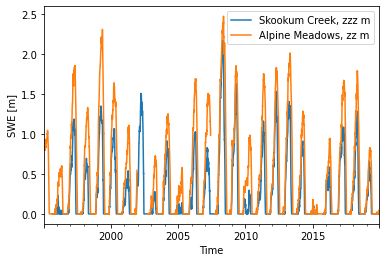

In [450]:
#plot SNOTELS:
ax = snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, zzz m')
snotel_Alpine.plot(kind='line', y = 'SWE_m', label = 'Alpine Meadows, zz m', ax = ax)
ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [m]')

plt.show()

In [451]:
#skook_ds = snotel_Skookum.to_xarray()
#alpine_ds = snotel_Alpine.to_xarray()

In [452]:

#test = skook_ds['daily_P_in'].cumsum(dim = "index").resample(index = "1y")
#test


In [453]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#skooK_P_SPU = pd.read_csv(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

In [454]:
#def spu_snotel_data(path_SPU):
#    parse_dates = ['DateTime']
#    snotel_obs = pd.read_csv(path_SPU,  sep='\s+', parse_dates=parse_dates)
#    snotel_obs = snotel_obs.set_index(snotel_obs['DateTime'])
#    calc_water_year_apply_SPU(snotel_obs)
#    return snotel_obs

In [455]:

snotel_obs_SPU_skook = fc.spu_snotel_data(path_snotel_skooK_P_SPU)
#snotel_obs_SPU_skook.Total.plot()
#snotel_obs_SPU_skook.index.rename('time')
#idx = snotel_obs_SPU_skook.index
#idx.set_names('time')

In [456]:
#SPU_data_frame = snotel_obs_SPU_skook

#time_index = SPU_data_frame.DateTime
#time_index  = time_index.to_numpy()
#SPU_data = SPU_data_frame.to_numpy()
#snotel_obs_SPU = xr.DataArray(SPU_data, coords= [time_index], dims= 'time')
#ds_snotel_obs_SPU = snotel_obs_SPU.to_dataset()
#ds_snotel_obs_SPU['Max'].attrs['units'] = "mm/d"
#ds_snotel_obs_SPU['Min'].attrs['units'] = "mm/d"
#ds_snotel_obs_SPU['Total'].attrs['units'] = "mm/d"


In [457]:
#type(SPU_data)

In [458]:
#SPU_data_frame = SPU_data_frame.to_numpy()

In [459]:
def spu_snotel_data_xr(SPU_data_frame):
    """get precip data in xclim format
    add units for processing with xclim"""
    #snotel_obs_SPU = SPU_data_frame.to_xarray()
    SPU_data_frame.index.set_names('time', inplace=True)
    #snotel_obs_SPU = xr.DataArray(
    #    SPU_data_frame,
    #    coords= [time_index],
    #    dims= 'time',
    #)
    ds_snotel_obs_SPU = SPU_data_frame.to_xarray()
    ds_snotel_obs_SPU['Max'].attrs['units'] = "mm/d"
    ds_snotel_obs_SPU['Min'].attrs['units'] = "mm/d"
    ds_snotel_obs_SPU['Total'].attrs['units'] = "mm/d"
    return ds_snotel_obs_SPU


def bcbq_snotel_data_xr(bcbq_data_frame):
    """get precip data in xclim format
    add units for processing with xclim"""
    bcbq_data_frame.index.set_names('time', inplace=True)
    snotel_obs = bcbq_data_frame.to_xarray()
    #time_index = snotel_obs_.index
    #time_index  = time_index.to_numpy()
    #bcbq_data_frame_ = snotel_obs_.to_array

    #snotel_obs = xr.DataArray(
    #    bcbq_data_frame_,
    #coords= [time_index],
    #dims= 'time',
    #)
    snotel_obs.daily_P_in.attrs['units'] = "mm/d"
    snotel_obs['Tmax_F'].attrs['units'] = "F"
    snotel_obs['Tmin_F'].attrs['units'] = "F"
    snotel_obs['Tmean_F'].attrs['units'] = "F"
    snotel_obs['Tmean_C'].attrs['units'] = "C"
    snotel_obs['SWE_in'].attrs['units'] = "in"
    snotel_obs['SWE_m'].attrs['units'] = "m"
    return snotel_obs

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


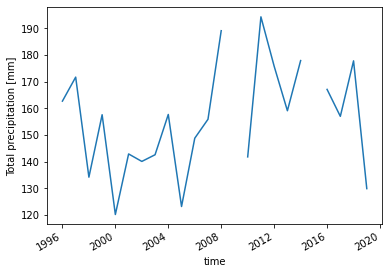

In [481]:
ds_bcbq_obs_SPU_skook = bcbq_snotel_data_xr(snotel_Skookum)
out = xc.atmos.precip_accumulation(ds_bcbq_obs_SPU_skook.daily_P_in, freq="YS")
out.plot()

In [482]:
ds_snotel_obs_SPU_skook = spu_snotel_data_xr(snotel_obs_SPU_skook)

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


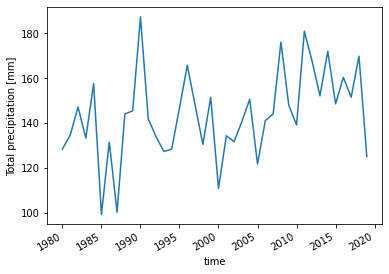

In [483]:
out1 = xc.atmos.precip_accumulation(ds_snotel_obs_SPU_skook.Total, freq="YS")
out1.plot()

In [485]:
out_df = out.to_dataframe()
out1_df = out1.to_dataframe()
out1_df

,prcptot
time,
1979-01-01,NaN
1980-01-01,128.497
1981-01-01,134.716
1982-01-01,147.233
1983-01-01,133.345
1984-01-01,157.707
1985-01-01,99.304
1986-01-01,131.616
1987-01-01,100.340


<AxesSubplot:xlabel='time'>

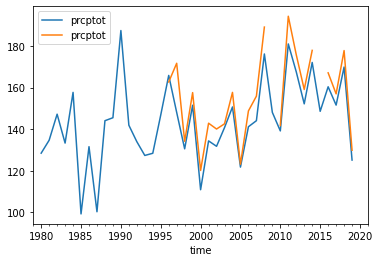

In [487]:
ax = out1_df.plot()
out_df.plot(ax=ax)

In [318]:
out2 = xc.atmos.tx_days_above(ds_temp.Tmean_C, thresh="20 C", freq="MS")

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


KeyError: 'units'

In [154]:
out2

<xarray.DataArray 'tx_days_above' (time: 314, index: 9529)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * time     (time) datetime64[ns] 1995-08-01 1995-09-01 ... 2021-09-01
  * index    (index) datetime64[ns] 1995-08-30 1995-08-31 ... 2021-09-30
Attributes:
    units:          days
    cell_methods:    time: sum over days
    history:        [2022-07-23 10:10:51] tx_days_above: TX_DAYS_ABOVE(tasmax...
    standard_name:  number_of_days_with_air_temperature_above_threshold
    long_name:      Number of days with tmax > 20 c
    description:    Monthly number of days where daily maximum temperature ex...

In [179]:
time_index = np.array(time_index)
time_index

In [179]:
#temp = skook_ds.Tmean_C
#temp.index.name = 'time'
#test.rename({'index':'time'})
#test

In [179]:
skook_ds.index.name = 'time'
skook_ds.rename({'index':'time'})
skook_ds

In [179]:
#temp.to_dataset()
out2 = xc.atmos.tx_days_above(da, thresh="20 C", freq="MS")